# Pre-processing symbols


### The undesired symbols are removed from class Fluorospot_Compact_FD


** Method **:

 - Implementing Sobel edge detection followed by thresholding to detect the objects

 - Object holes dilation to surround undesired pixels creates the final mask

 - Median filtered image is used to fill the holes


In [92]:
from helpers import show_normed_gray_image, output_to_img
from data_loader import Data_loader
import tensorflow as tf
from scipy.misc import imsave
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loader_object = Data_loader()

In [3]:
loader_object.build_data()

specified target data loader:  (0, 512, 512, 1)
0 b'Essenta_DR_Compact'
len : 71
1 b'DigitalDiagnost'
len : 7095
2 b'Fluorospot_Compact_FD'
len : 3264
3 b'DX-G'
len : 308
4 b'PCR_Eleva'
len : 10
5 b'CXDI'
len : 132
check images properties
data size is :  (10880, 512, 512, 1)
Data is devided into class a: Fluorospot_Compact_FD and class b: DigitalDiagnost


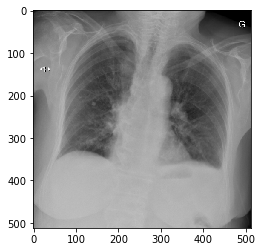

In [6]:
show_normed_gray_image(loader_object.processed_a, idx=0)

In [93]:
from scipy import ndimage, misc

template = loader_object.processed_a[0]

In [94]:
res = (ndimage.sobel(np.squeeze(template*255)) > 150)

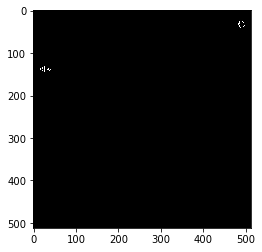

In [95]:
to_print = np.array(res, dtype=np.float32)
show_normed_gray_image(np.expand_dims(np.expand_dims(res,0), 3), idx=0)

In [96]:
dilate = ndimage.morphology.binary_dilation(res, iterations=5)

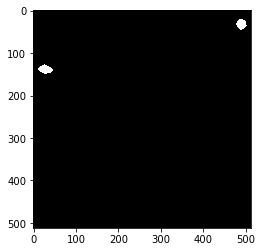

In [97]:
to_print = np.array(dilate, dtype=np.float32)
show_normed_gray_image(np.expand_dims(np.expand_dims(dilate,0), 3), idx=0)

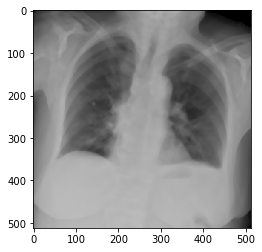

In [98]:
med_filt = ndimage.filters.median_filter(template, size=9)
show_normed_gray_image(np.expand_dims(med_filt,0), idx=0)

In [99]:
fdilate = np.expand_dims(dilate,2)
reconstruct = template*(1-fdilate) + fdilate*med_filt

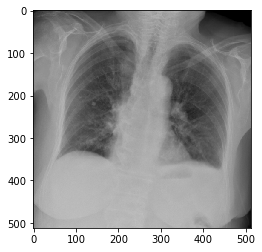

In [100]:
show_normed_gray_image(np.expand_dims(reconstruct,0),idx=0)

In [101]:
import tensorflow as tf

init = (tf.global_variables_initializer(), tf.local_variables_initializer())  

with tf.Session() as sess:
    
    sess.run(init)
    template = output_to_img(sess, template, 1)
    reconstruct = output_to_img(sess, reconstruct, 1)

    print(template.shape)
    imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/template.png',template)
    imsave('/mnt/dataC/project_GANs/HUGxGAN_deep_learning/reconstruct.png',reconstruct)

(512, 512, 3)
